# CAR T Model

This notebook simulates the phenomenological model of immunogenic cell death (ICD) using UPMaBoSS approach.
This notebook can be launched using the Docker image of CoLoMoTo:

    $docker pull colomoto/colomoto-docker

or by creating a conda environment with the following command:

    $conda create -n umb -c colomoto -c potassco pymaboss notebook seaborn ginsim-python

To launch this notebook, type the command:

    $conda activate umb
    $jupyter notebook

In [1]:
#import ginsim
import maboss # for (UP)MaBoSS
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import time # for measuring simluation time
plt.rcParams.update({'font.size': 16})

The network corresponding to the model that we are analysing can be visualized as follows. It was built with GINsim but cannot be simulated with GINsim because of the cell-cell communication. The rectangles concern the entities that are secreted or expressed inthe tumours. Others are related to the CAR T cell regulation.  

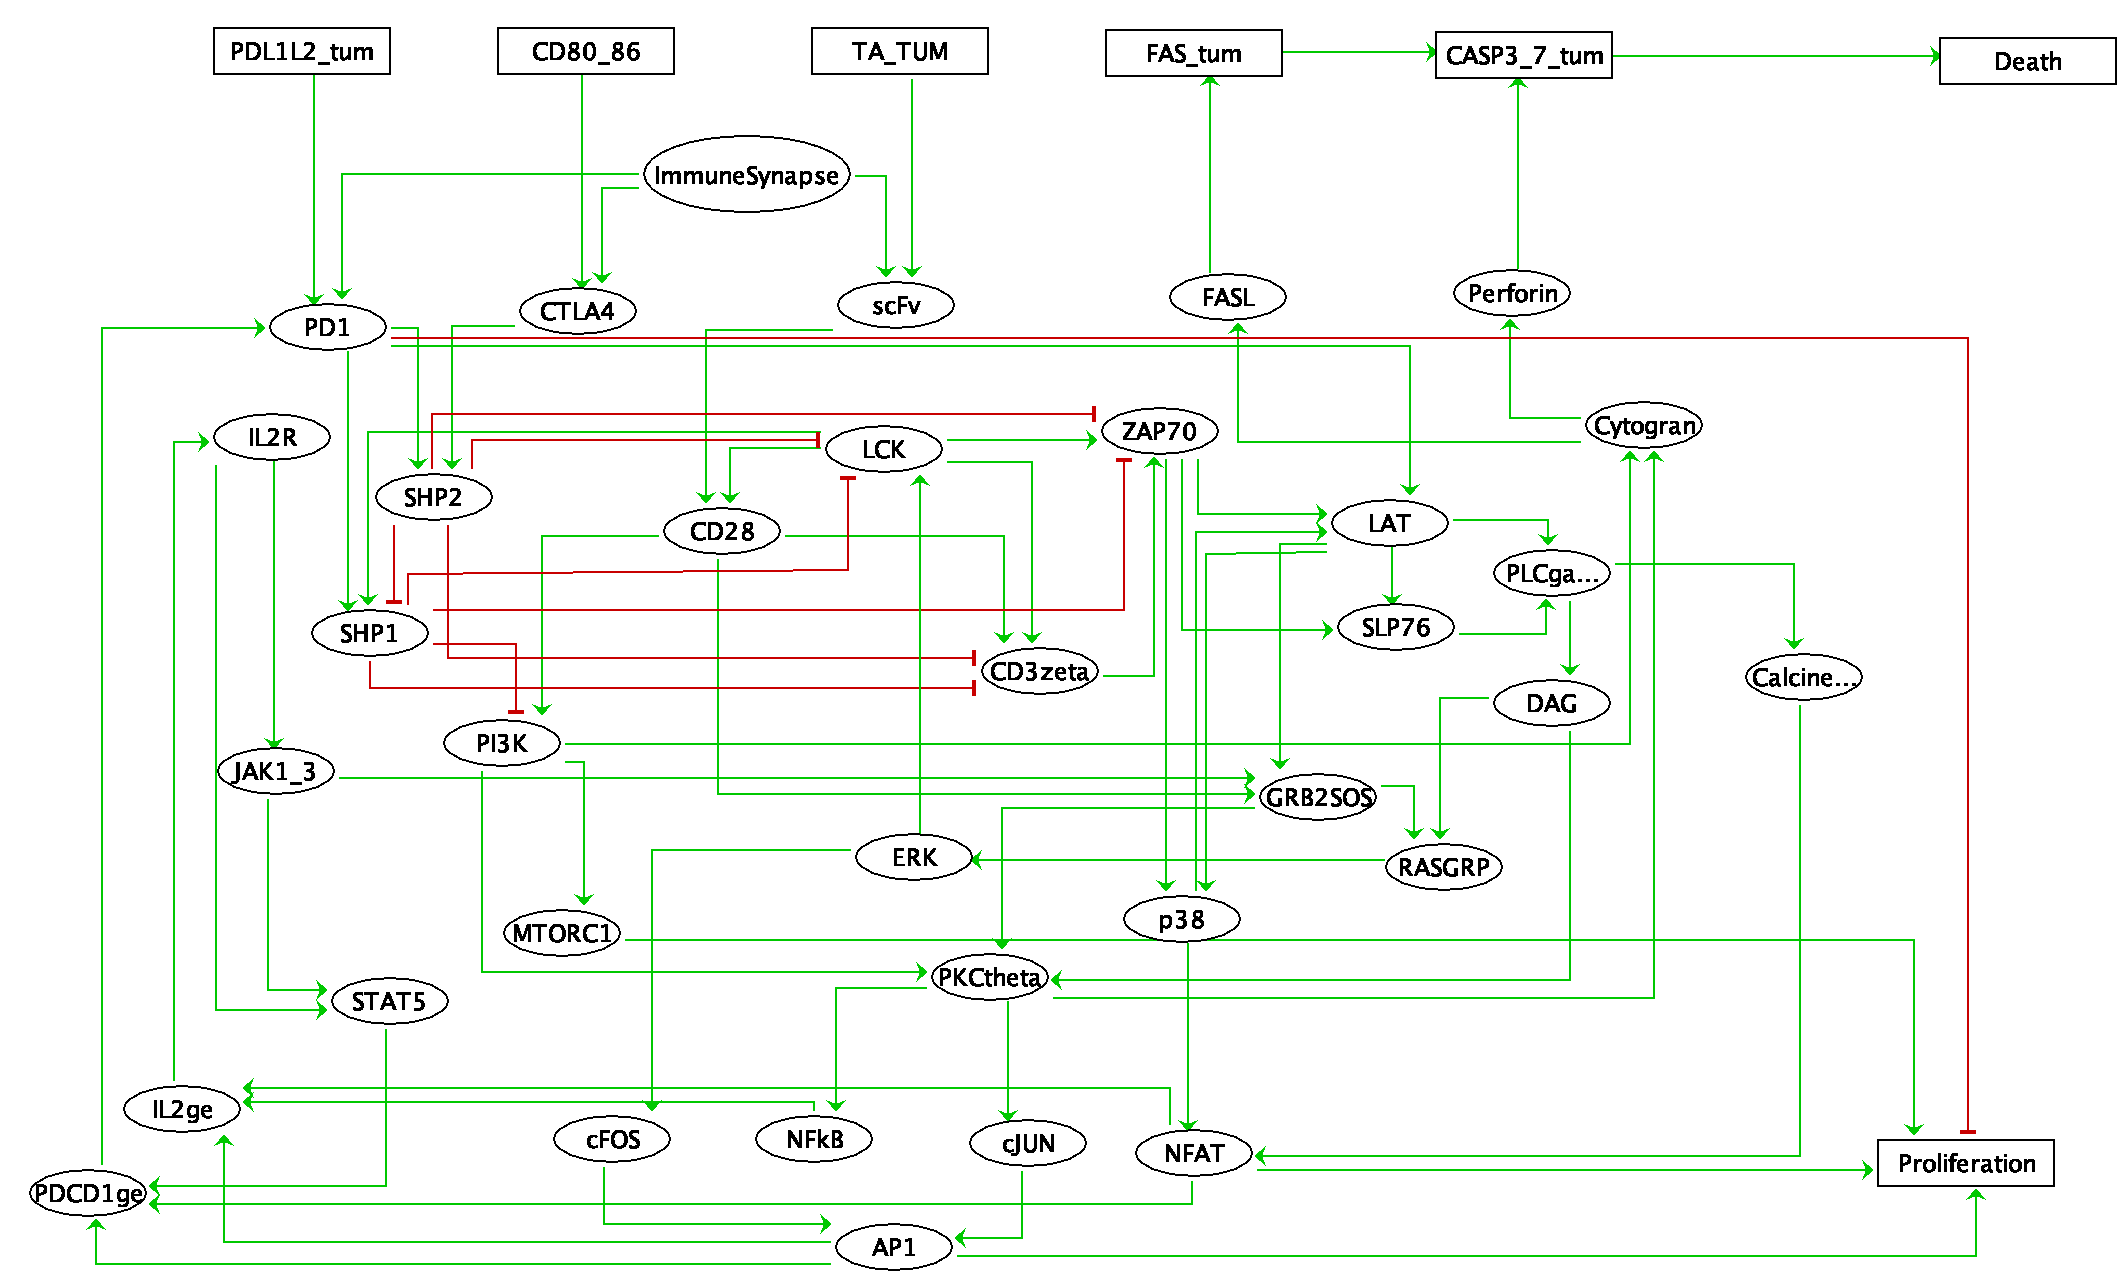

## Model files

In [2]:
bnd = 'CART_LC_gs.bnd'
cfg = 'CART_LC_gs4Jup.cfg'
upp = 'CART_LC_gs.upp'

In [3]:
maboss_model = maboss.load(bnd,cfg)

In [4]:
#model_maboss.update_parameters($Trans=1)

## Simulation of model with ICD

In [5]:
up_maboss_model = maboss.UpdatePopulation(maboss_model,upp) # create UPMaBoSS model

In [6]:
start = time.time()
res_up_model = up_maboss_model.run("ResUpModel") # run simulation, put intermediate MaBoSS steps in ResUpModel folder
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  0.06683137416839599  mins


In [7]:
table_res = res_up_model.get_nodes_stepwise_probability_distribution(('TUM','CART','CASP3_tum','FAS_tum','Proliferation','Perforin','NFAT','AP1','Division','Death'))

In [8]:
table_res.nodes_list_stepwise_probability_distribution = None

### Plot time dependent cell types 

In [9]:
sns.set_style("white")
colormap_scale = sns.light_palette("black", as_cmap=True)
colormap_ratios = sns.diverging_palette(240, 0, center='light', as_cmap=True)
def save_figure(figure, title):
    figure.savefig("%s.pdf" % title, bbox_inches="tight")

This figure shows the temporal evolution of the cell types

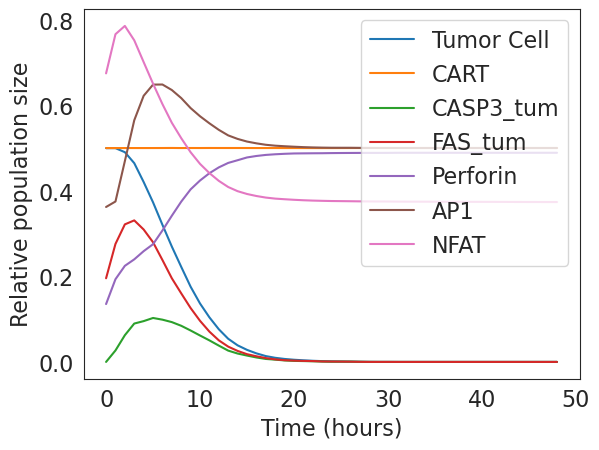

In [10]:
figure_res = plt.figure()
plt.plot(table_res['PopRatio']*table_res['TUM'],label="Tumor Cell")
plt.plot(table_res['PopRatio']*table_res['CART'],label="CART")
plt.plot(table_res['PopRatio']*table_res['CASP3_tum'],label="CASP3_tum")
plt.plot(table_res['PopRatio']*table_res['FAS_tum'],label="FAS_tum")
plt.plot(table_res['PopRatio']*table_res['Perforin'],label="Perforin")
plt.plot(table_res['PopRatio']*table_res['AP1'],label="AP1")
plt.plot(table_res['PopRatio']*table_res['NFAT'],label="NFAT")
#plt.plot(table_res['PopRatio']*table_res['Proliferation'],label="Prolif")
plt.ylabel("Relative population size")
plt.xlabel("Time (hours)")
plt.legend()
save_figure(figure_res,"Entities")

In [11]:
#maboss_model.print_cfg()


In [12]:
#table_res_2 = res_up_model.get_nodes_stepwise_probability_distribution(('Proliferation','Death','Division'))

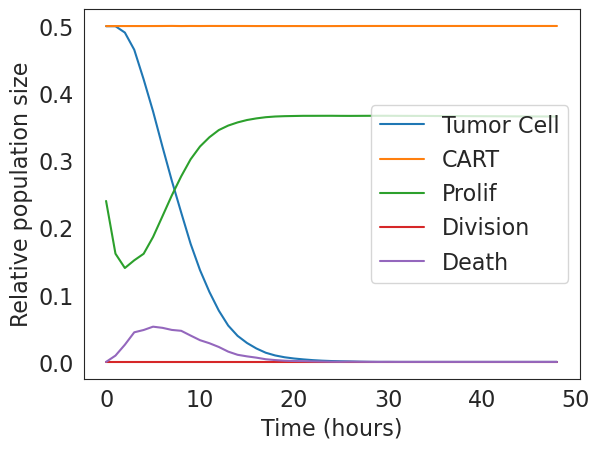

In [13]:
figure_res_2 = plt.figure()
plt.plot(table_res['PopRatio']*table_res['TUM'],label="Tumor Cell")
plt.plot(table_res['PopRatio']*table_res['CART'],label="CART")
plt.plot(table_res['PopRatio']*table_res['Proliferation'],label="Prolif")
plt.plot(table_res['PopRatio']*table_res['Division'],label="Division")
plt.plot(table_res['PopRatio']*table_res['Death'],label="Death")
plt.ylabel("Relative population size")
plt.xlabel("Time (hours)")
plt.legend()
#save_figure(figure_res_2,"CellTypes")

In [16]:
model_TA_off = maboss.copy_and_mutate(maboss_model, ["TA_tum"], 'OFF')
up_TA_model = maboss.UpdatePopulation(model_TA_off,upp) # create UPMaBoSS model

In [17]:
start = time.time()
res_up_model = up_TA_model.run("ResUpTAOFF") # run simulation, put intermediate MaBoSS steps in ResUpModel folder
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

['symbol $nb_mutable is not defined', 'BooleanNetwork exception: ']
exec. time:  0.06278371810913086  mins


In [18]:
table_res_TA = res_up_model.get_nodes_stepwise_probability_distribution(('TUM','CART','CASP3_tum','FAS_tum','Proliferation','Perforin','NFAT','AP1','Division','Death'))
table_res_TA.nodes_list_stepwise_probability_distribution = None

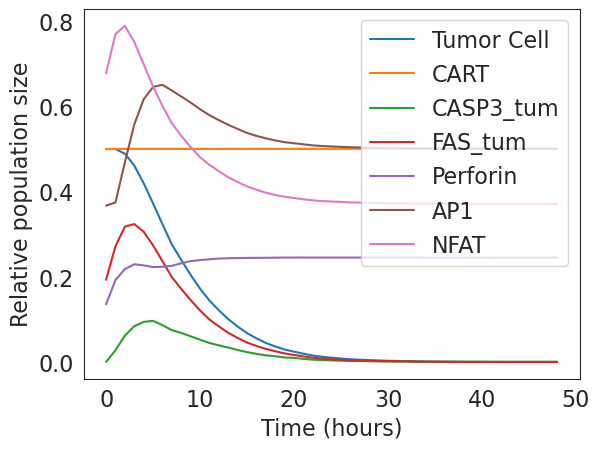

In [19]:
figure_res = plt.figure()
plt.plot(table_res_TA['PopRatio']*table_res_TA['TUM'],label="Tumor Cell")
plt.plot(table_res_TA['PopRatio']*table_res_TA['CART'],label="CART")
plt.plot(table_res_TA['PopRatio']*table_res_TA['CASP3_tum'],label="CASP3_tum")
plt.plot(table_res_TA['PopRatio']*table_res_TA['FAS_tum'],label="FAS_tum")
plt.plot(table_res_TA['PopRatio']*table_res_TA['Perforin'],label="Perforin")
plt.plot(table_res_TA['PopRatio']*table_res_TA['AP1'],label="AP1")
plt.plot(table_res_TA['PopRatio']*table_res_TA['NFAT'],label="NFAT")
#plt.plot(table_res_TA['PopRatio']*table_res_TA['Proliferation'],label="Prolif")
plt.ylabel("Relative population size")
plt.xlabel("Time (hours)")
plt.legend()
save_figure(figure_res,"Entities_TA")